In [7]:
from google.colab import files
uploaded = files.upload()

Saving id.jpg to id.jpg


In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 4s (133 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

In [3]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

M kontan
Indian Institute of Technology Bombay

PA SA LN BENAR AA a Mel Ia

 

Manav Bhatt

A1

yr / Programme

B.Tech

fat / Department
Environmental Science & Engineering

RE Ie / Blood Group Bt-ve
UNA MOM » B

23B4211
aya / Validity 31/05/2027

 

 

ATaraeea duck / Emergency Contacts:
IR / Home

ang angel Has | IIT Bon 5 2989



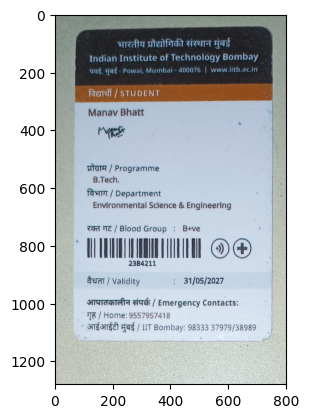

In [8]:
img = cv2.imread("/content/id.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', text.shape[0] + 1)

In [11]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")

print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

     level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        1         1          0        0         0         0     0     0   
1        2         1          1        0         0         0   120    82   
2        3         1          1        1         0         0   120    82   
3        4         1          1        1         1         0   217    82   
4        5         1          1        1         1         1   217    88   
..     ...       ...        ...      ...       ...       ...   ...   ...   
106      5         1         14        1         1         3   231  1073   
107      5         1         14        1         1         4   304  1075   
108      5         1         14        1         1         5   344  1079   
109      5         1         14        1         1         6   479  1082   
110      5         1         14        1         1         7   648  1076   

     width  height  conf  text  
0      802    1280    -1   NaN  
1      583 

In [12]:
from pytesseract import Output

img = cv2.imread('id.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


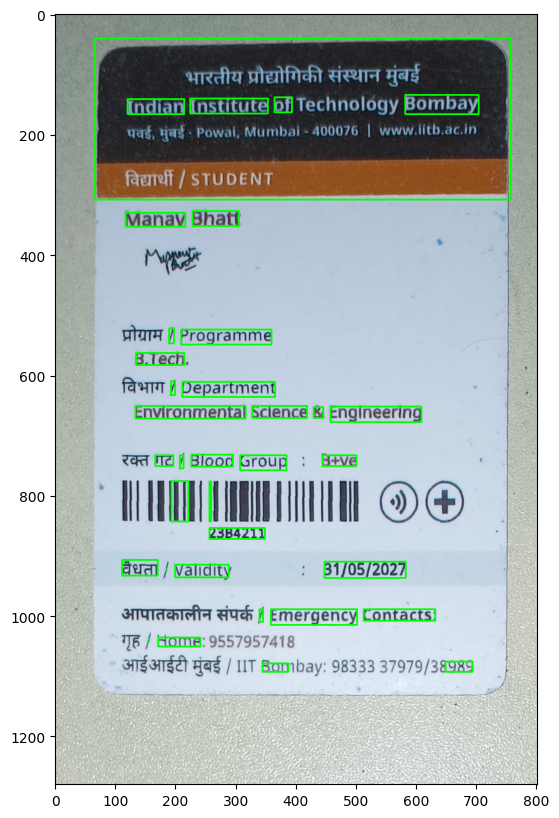

In [13]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)